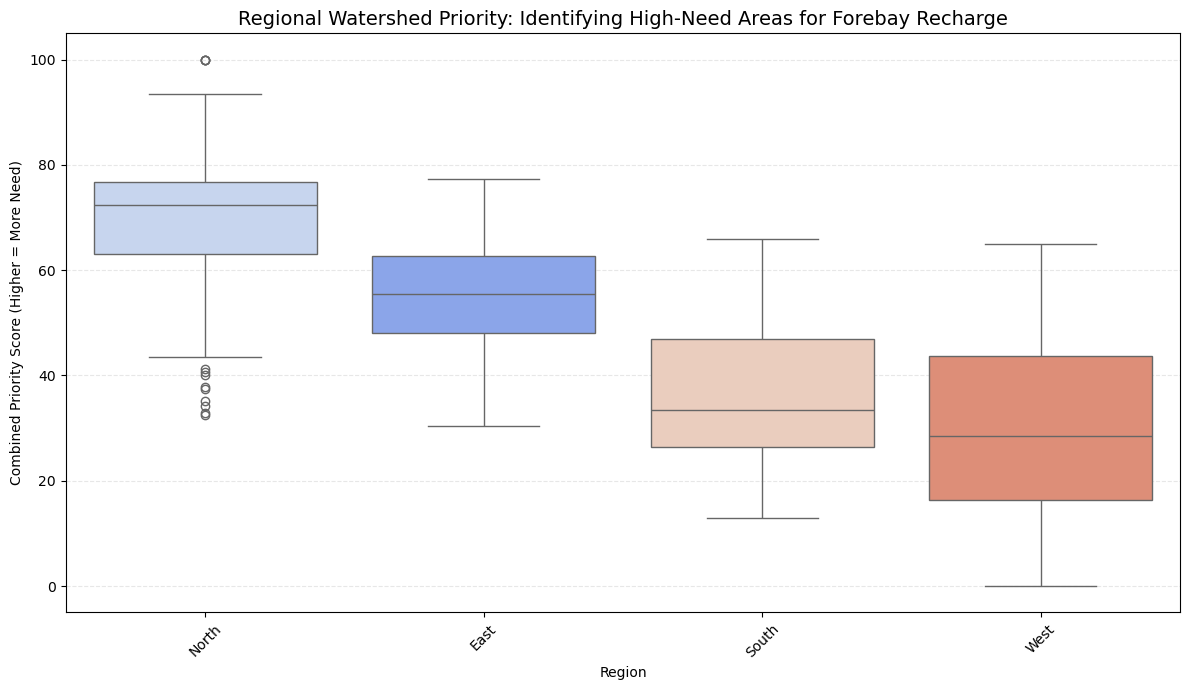

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns  # Added missing import

# 1. DATA SOURCE
csv_url = "https://raw.githubusercontent.com/nouhy01/CWH-UCLA-Project/main/Data/Community%20Characteristics/Green_Schoolyards_Category_Indexes.csv"
forebays_url = "https://raw.githubusercontent.com/nouhy01/CWH-UCLA-Project/main/Data/Watershed/Hydrogeologic%20forebays.geojson"

try:
    df_index = pd.read_csv(csv_url)
    gdf_forebays = gpd.read_file(forebays_url)
    
    # Standardize column names
    df_index.columns = df_index.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
    
    # 2. DATA PREPARATION
    # Ensure 'Combined Category 1 Score' is treated as a number
    df_index['Priority'] = pd.to_numeric(df_index['Combined Category 1 Score'], errors='coerce')
    
    # Remove rows with NaN in Priority or Region to prevent plotting errors
    df_temp = df_index.dropna(subset=['Priority', 'Region'])
    
    # 3. VISUALIZATION
    plt.figure(figsize=(12, 7))
    
    # Sort regions by median priority for a cleaner visual
    order = df_temp.groupby('Region')['Priority'].median().sort_values(ascending=False).index
    sns.boxplot(
        x='Region', 
        y='Priority', 
        data=df_temp, 
        order=order, 
        palette='coolwarm',
        hue='Region',
        legend=False
    )
    
    plt.title('Regional Watershed Priority: Identifying High-Need Areas for Forebay Recharge', fontsize=14)
    plt.ylabel('Combined Priority Score (Higher = More Need)')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xticks(rotation=45) # Rotated labels to prevent overlap
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")

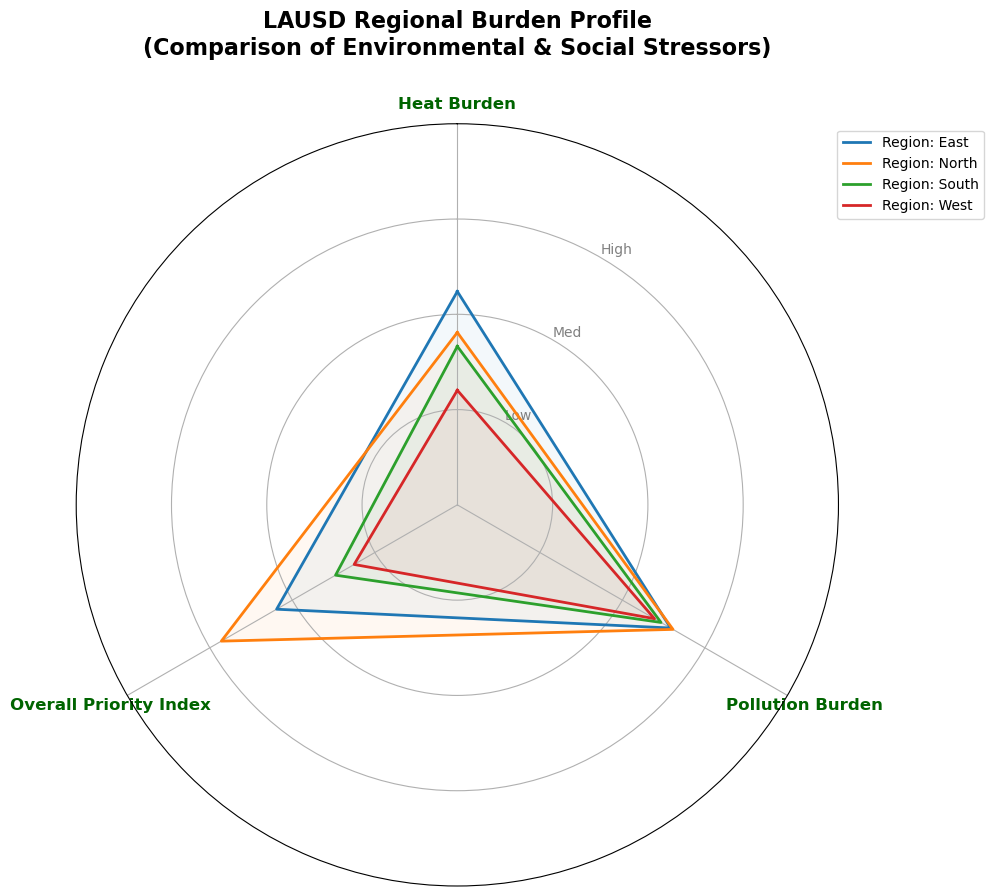

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. DATA SOURCE
url = "https://raw.githubusercontent.com/nouhy01/CWH-UCLA-Project/main/Data/Community%20Characteristics/Green_Schoolyards_Category_Indexes.csv"

try:
    df = pd.read_csv(url)
    df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
    
    # 2. SELECT & CLEAN METRICS
    metrics = [
        'Extreme Heat Temperature Score',
        'CalEnviroScreen Score',
        'Combined Category 1 Score'
    ]
    
    for col in metrics:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 3. REGIONAL AGGREGATION
    df_regional = df.groupby('Region')[metrics].mean().dropna()

    # 4. RADAR SETUP
    categories = ['Heat Burden', 'Pollution Burden', 'Overall Priority Index']
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Adjust layout
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Label the spokes
    plt.xticks(angles[:-1], categories, color='darkgreen', size=12, fontweight='bold')

    # 5. PLOT EACH REGION
    for region in df_regional.index:
        values = df_regional.loc[region].values.flatten().tolist()
        values += values[:1]
        
        # Plot line
        line, = ax.plot(angles, values, linewidth=2, label=f"Region: {region}")
        # Fill area with very low alpha to keep it readable
        ax.fill(angles, values, alpha=0.05)

    # Labeling
    ax.set_rlabel_position(30)
    plt.yticks([25, 50, 75], ["Low", "Med", "High"], color="grey", size=10)
    plt.ylim(0, 100)

    plt.title('LAUSD Regional Burden Profile\n(Comparison of Environmental & Social Stressors)', size=16, y=1.08, fontweight='bold')
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")

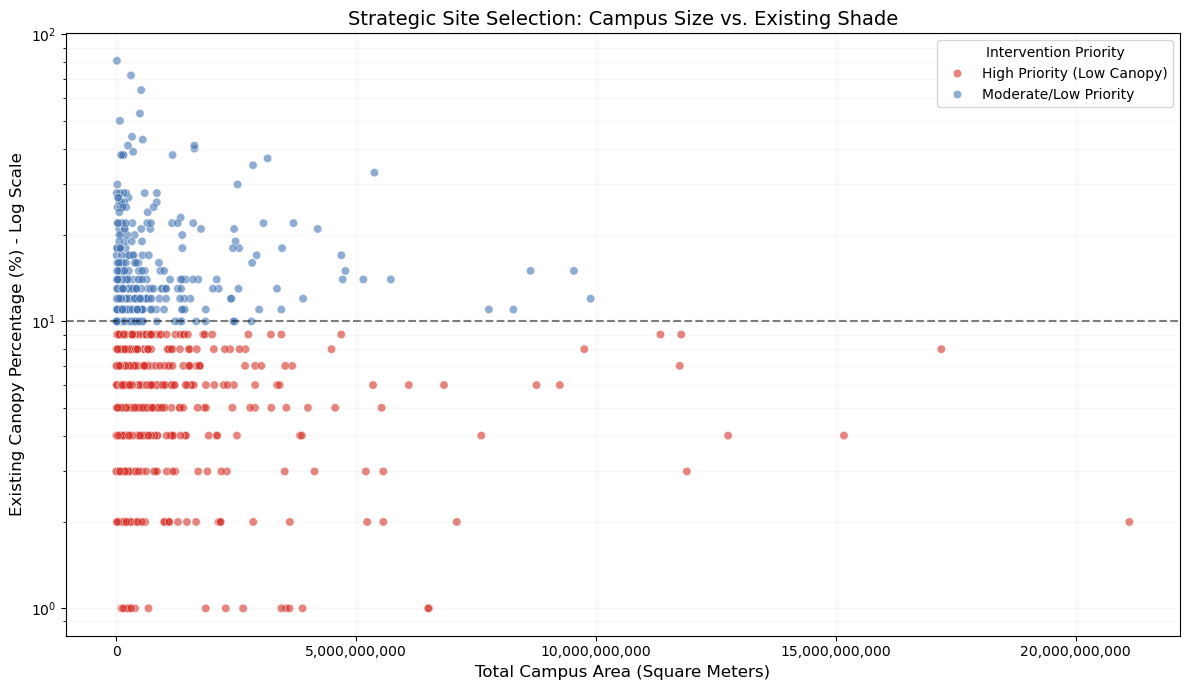

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. DATA SOURCE
canopy_url = "https://raw.githubusercontent.com/nouhy01/CWH-UCLA-Project/main/Data/School%20Canopy/school_canopy_data.csv"

try:
    df = pd.read_csv(canopy_url)
    
    # 2. DATA CLEANING
    df['Canopy_Pct'] = pd.to_numeric(df['STACNPPCTA'], errors='coerce')
    df['Campus_Area_M2'] = pd.to_numeric(df['SHAPE_AREA'], errors='coerce')
    
    # Filter for log scale compatibility (must be > 0)
    df_plot = df[df['Canopy_Pct'] > 0].copy()
    
    # 3. PRIORITY TAGGING
    df_plot['Status'] = df_plot['Canopy_Pct'].apply(
        lambda x: 'High Priority (Low Canopy)' if x < 10 else 'Moderate/Low Priority'
    )
    
    # 4. PLOT GENERATION
    plt.figure(figsize=(12, 7))
    ax = sns.scatterplot(
        x='Campus_Area_M2', 
        y='Canopy_Pct', 
        hue='Status', 
        palette={'High Priority (Low Canopy)': '#d73027', 'Moderate/Low Priority': '#4575b4'},
        alpha=0.6, 
        edgecolor='w',
        data=df_plot
    )

    # 5. LOG SCALE & FORMATTING
    plt.yscale('log')
    
    # Use commas for the x-axis to make square meters readable
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.title('Strategic Site Selection: Campus Size vs. Existing Shade', fontsize=14)
    plt.xlabel('Total Campus Area (Square Meters)', fontsize=12) # Units updated to Meters
    plt.ylabel('Existing Canopy Percentage (%) - Log Scale', fontsize=12)
    
    plt.axhline(10, color='black', linestyle='--', alpha=0.5) 
    
    plt.legend(title='Intervention Priority')
    plt.grid(True, which="both", ls="-", alpha=0.1)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")

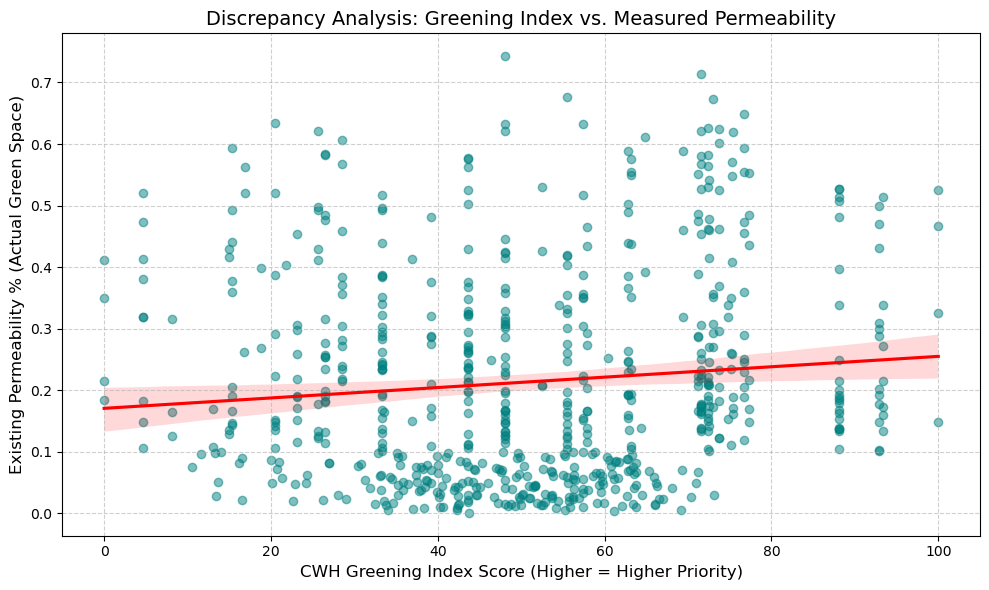

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. DATA SOURCE
df = pd.read_csv('Green_Schoolyards_Category_Indexes.csv')

# 2. Clean headers to remove newlines (\n) and extra spaces
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Identify the columns based on your provided list
x_col = 'Combined Category 1 Score'
y_col = 'Schoolyard % Permeable'

# 3. Clean numeric data and handle repeated header rows
# errors='coerce' turns text artifacts into NaN so they can be dropped
df[y_col] = pd.to_numeric(df[y_col].astype(str).str.replace('%', ''), errors='coerce')
df[x_col] = pd.to_numeric(df[x_col], errors='coerce')

# Drop rows that don't have valid numbers in both columns
df = df.dropna(subset=[x_col, y_col])

# 4. Generate the Discrepancy Visual
plt.figure(figsize=(10, 6))

# Simple regression plot
sns.regplot(x=x_col, y=y_col, data=df, 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'red'})

# Formatting
plt.title('Discrepancy Analysis: Greening Index vs. Measured Permeability', fontsize=14)
plt.xlabel('CWH Greening Index Score (Higher = Higher Priority)', fontsize=12)
plt.ylabel('Existing Permeability % (Actual Green Space)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()